<a href="https://colab.research.google.com/github/intertech-academy/image_processing_py/blob/main/CPO6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dekonwolucja

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal 
import scipy.linalg
from PIL import Image

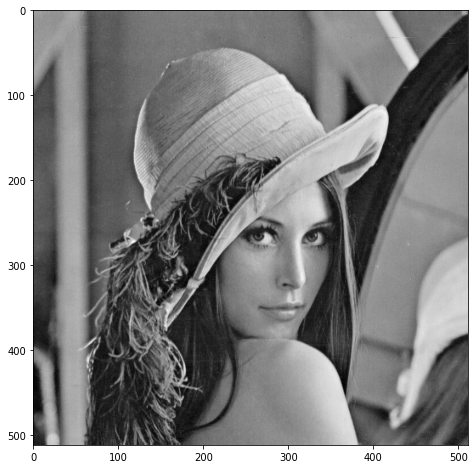

In [ ]:
#Wczytanie obrazu
im = np.array(Image.open('lena.png'))/255.0
im = np.mean(im, axis = 2)

plt.figure(figsize = (8,8))
plt.imshow(im, cmap='gray')

Text(0.5, 1.0, 'Obraz rozmyty')

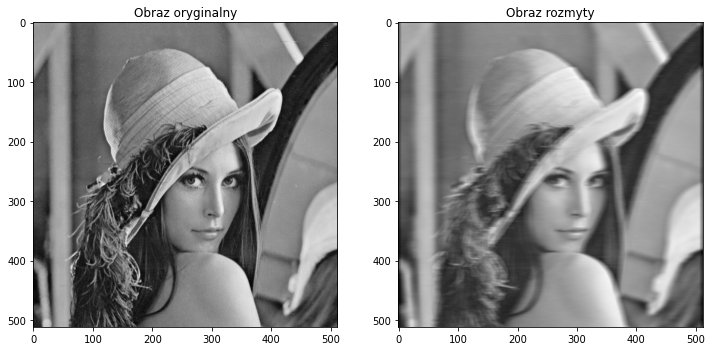

In [ ]:
#Symulacja rozmycia
no_bins = 13
h = np.ones((1, no_bins))/no_bins
x = im

y = scipy.signal.convolve2d(x, h, mode = 'same')

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.imshow(x, cmap='gray')
plt.title('Obraz oryginalny')

plt.subplot(1,2,2)
plt.imshow(y, cmap='gray')
plt.title('Obraz rozmyty')

## Splot (konwolucja) sygnałów 1D

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

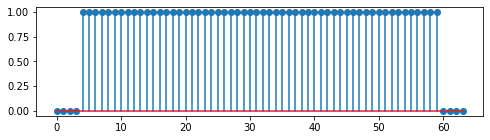

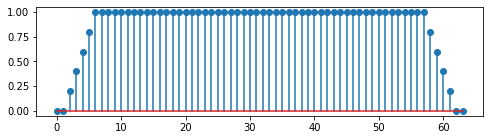

In [ ]:
no_samples = 64
x = np.zeros(no_samples)
x[4:-4] = 1

no_bins = 5
h = np.ones(no_bins)/no_bins

y = scipy.signal.convolve(x, h, mode = 'same')

plt.figure(figsize = (8, 2))
plt.stem(x)

plt.figure(figsize = (8, 2))
plt.stem(y)

# Splot jako iloczyn dwóch macierzy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


Text(0.5, 1.0, 'Wynik mnożenia macierzy')

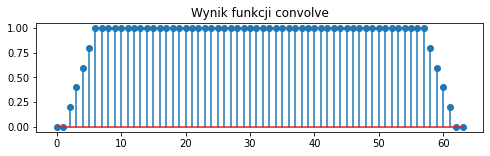

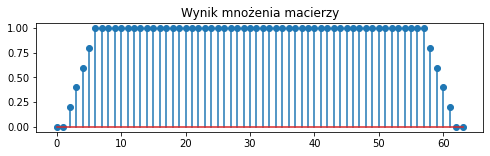

In [ ]:
h_pad = np.concatenate((h, np.zeros(no_samples - no_bins)))
h_pad = np.roll(h_pad, -int(no_bins/2))

H = scipy.linalg.circulant(h_pad)

y_ = np.matmul(H, x)

plt.figure(figsize = (8, 2))
plt.stem(y)
plt.title('Wynik funkcji convolve')

plt.figure(figsize = (8, 2))
plt.stem(y_)
plt.title('Wynik mnożenia macierzy')

## Dekonwolucja - odtwarzanie obrazów

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'Sygnał odtworzony')

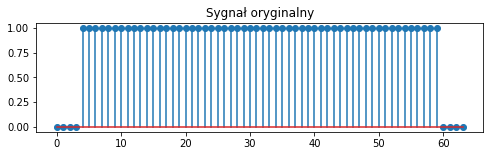

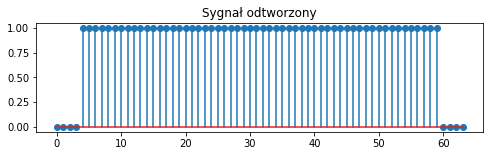

In [ ]:
x_ = np.linalg.solve(H, y)

plt.figure(figsize = (8, 2))
plt.stem(x)
plt.title('Sygnał oryginalny')

plt.figure(figsize = (8, 2))
plt.stem(x_)
plt.title('Sygnał odtworzony')

In [ ]:
print(f'det(H) = {np.linalg.det(H)}')

det(H) = 9.223372036853939e-45


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves

Text(0.5, 1.0, 'Sygnał odtworzony')

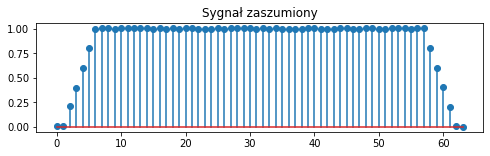

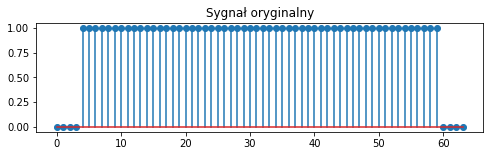

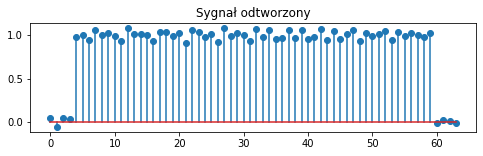

In [ ]:
y_n = y + np.random.rand(no_samples)*0.01
x_n = np.linalg.solve(H, y_n)


plt.figure(figsize = (8, 2))
plt.stem(y_n)
plt.title('Sygnał zaszumiony')

plt.figure(figsize = (8, 2))
plt.stem(x)
plt.title('Sygnał oryginalny')

plt.figure(figsize = (8, 2))
plt.stem(x_n)
plt.title('Sygnał odtworzony')

In [ ]:
h_pad = np.concatenate((h, np.zeros(no_samples - no_bins)))
h_pad = np.roll(h_pad, -int(no_bins/2))
h_pad[0] = h_pad[0] + 0.1

H_2 = scipy.linalg.circulant(h_pad)

print(f'det(H) = {np.linalg.det(H)}')
print(f'det(H_2) = {np.linalg.det(H_2)}')

det(H) = 9.223372036853939e-45
det(H_2) = 3.349672119878807e-45


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a s

Text(0.5, 1.0, 'Sygnał odtworzony (szum + regularyzacja)')

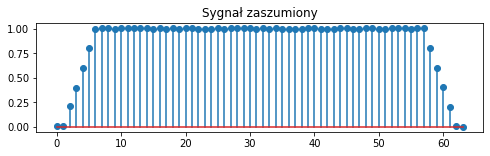

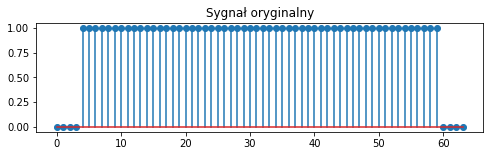

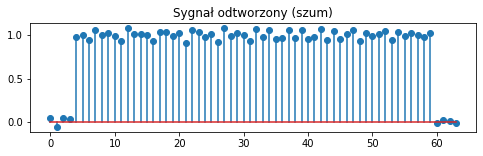

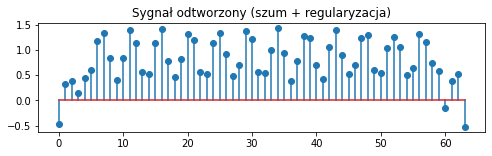

In [ ]:
x_n2 = np.linalg.solve(H_2, y_n)


plt.figure(figsize = (8, 2))
plt.stem(y_n)
plt.title('Sygnał zaszumiony')

plt.figure(figsize = (8, 2))
plt.stem(x)
plt.title('Sygnał oryginalny')

plt.figure(figsize = (8, 2))
plt.stem(x_n)
plt.title('Sygnał odtworzony (szum)')

plt.figure(figsize = (8, 2))
plt.stem(x_n2)
plt.title('Sygnał odtworzony (szum + regularyzacja)')